In [1]:
import numpy as np
from numpy.random import rand
from scipy import optimize
from scipy import sparse

import matplotlib.pyplot as plt

In [2]:
# CSR-матрица
sample_csr = sparse.csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])


In [3]:
# CSС-матрица
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])
sample_csc = sparse.csc_matrix((data, (row, col)), shape=(3, 3))

In [4]:
# COO-матрица
I = np.array([0,3,1,0])
J = np.array([0,3,1,2])
V = np.array([4,5,7,9])
sample_coo = sparse.coo_matrix((V,(I,J)),shape=(4,4))

In [5]:
# DOK-матрица
sample_dok = sparse.dok_matrix((5, 5), dtype=np.float32)

In [6]:
# Заполнение sparse-матриц
sample_lil = sparse.lil_matrix((2, 200))
sample_lil[0, :100] = np.ones(100)
sample_lil[1, 100:200] = sample_lil[0, :100]
sample_lil.setdiag(rand(1000))

for i in range(5):
    for j in range(5):
        sample_dok [i, j] = i + j

In [7]:
# Переведем в dense и исправим необходимые значения
tmp_filled = sample_csr.toarray()
tmp_filled[0, 0] = 10
sample_csr_new = sparse.csr_matrix(tmp_filled)

# Аналогично через сложение двух матриц
tmp_csr = sparse.csr_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csr_new = sample_csr + tmp_csr

In [8]:
v = np.array([1, 0, -1])

# Perform operations on sample_csr
tmp_csr = sparse.csr_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csr = sample_csr + tmp_csr
sample_csr = sample_csr.dot(v)

# Perform operations on sample_csc
tmp_csc = sparse.csc_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csc = sample_csc + tmp_csc
sample_csc = sample_csc.dot(v)

sample_lil_tmp = sparse.lil_matrix((2, 200))
sample_lil = sample_lil + sample_lil_tmp


In [9]:
# Задание 3.1
# Создайте матрицу CSR размером 3X4, в которой первый столбец заполнен единицами, а третий — четвёрками.
# Создайте sparse CSR-матрицу с помощью трёх массивов и запишите в переменную tmp.
# После каждой запятой обязательно добавьте пробел.

tmp = sparse.csr_matrix(
    ([1, 4, 1, 4, 1, 4], [0, 2, 0, 2, 0, 2], [0, 2, 4, 6]), shape=(3, 4)
)

In [10]:
# Задание 3.4
# Создайте матрицу CSR из списка списков размером 2x3, заполненную числами от  1 до 6.
# После каждой запятой обязательно добавьте пробел.

tmp = sparse.csr_matrix([[1, 2, 3], [4, 5, 6]])

----
### Триангуляция Делоне

In [11]:
from scipy.spatial import Delaunay

In [12]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])

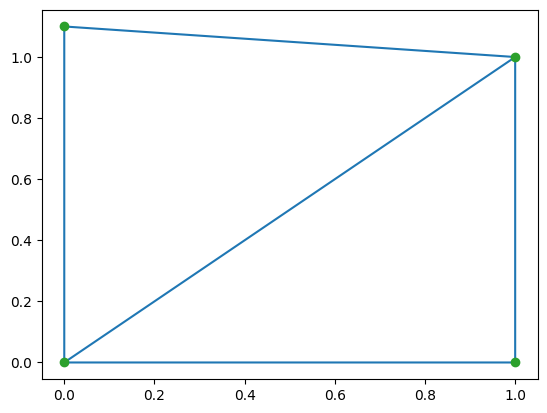

In [13]:
tri = Delaunay(points)

plt.triplot(
    points[:,0], # Координата х
    points[:,1], # Координаиа у
    tri.simplices # представляет тройки индексов точек, образующих каждый треугольник в триангуляции
)

plt.plot(points[:,0], points[:,1], 'o')

plt.show()

---
### ВЫПУКЛАЯ ОБОЛОЧКА

In [14]:
from scipy.spatial import ConvexHull

In [15]:
hull = ConvexHull(points)

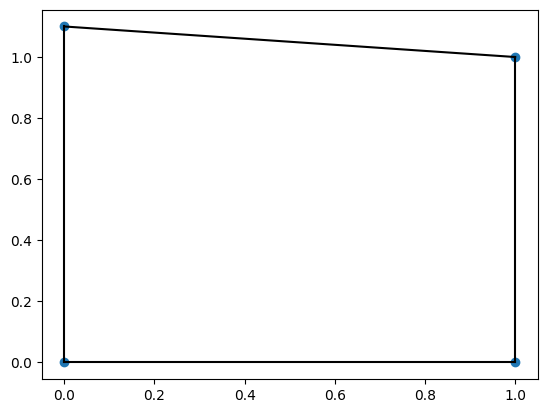

In [16]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

---
### ДИАГРАММЫ ВОРОНОГО

In [17]:
from scipy.spatial import Voronoi, voronoi_plot_2d

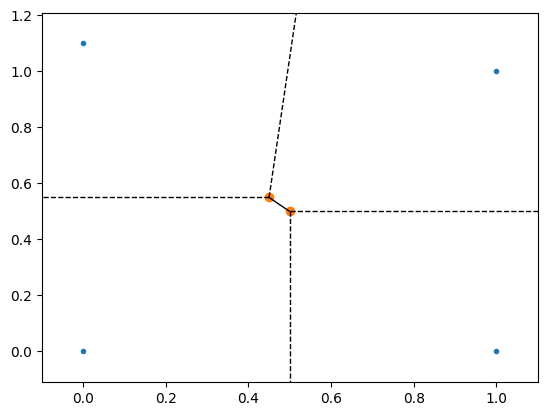

In [18]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

---
### МАТРИЦЫ РАССТОЯНИЙ

In [19]:
from scipy.spatial import distance_matrix

In [20]:
distance_matrix([[0, 1]], [[1, 2]], p=2)

array([[1.41421356]])

In [21]:
distance_matrix([[0, 1], [0, 1]], [[1, 2], [0, 1]], p=3)

array([[1.25992105, 0.        ],
       [1.25992105, 0.        ]])

---

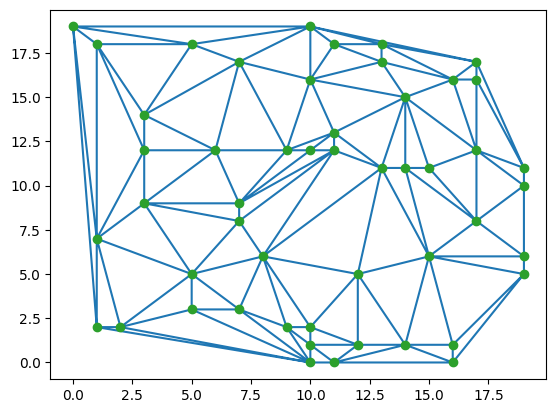

In [22]:
# Задание 5.2
# Выберите картинку, соответствующую триангуляции Делоне следующего набора точек:

points = np.array([(12, 1), (7, 17), (7, 3), (10, 12), (14, 15), (1, 2), (13, 11), (17, 16), (5, 18),
(10, 16), (9, 12), (3, 14), (12, 5), (19, 6), (13, 17), (17, 17), (1, 7), (1, 18), (19, 11), (14, 11),
(15, 11), (10, 1), (9, 2), (17, 12), (11, 18), (5, 5), (10, 0), (16, 0), (14, 1), (7, 9), (5, 3), (11,
13), (2, 2), (0, 19), (3, 12), (7, 8), (11, 12), (3, 9), (10, 2), (16, 1), (13, 18), (19, 5), (15, 6),
(17, 8), (8, 6), (10, 19), (19, 10), (16, 16), (11, 0), (6, 12)])

tri = Delaunay((points))

plt.triplot(
    points[:,0], # Координата х
    points[:,1], # Координаиа у
    tri.simplices # представляет тройки индексов точек, образующих каждый треугольник в триангуляции
)

plt.plot(points[:,0], points[:,1], 'o')

plt.show()

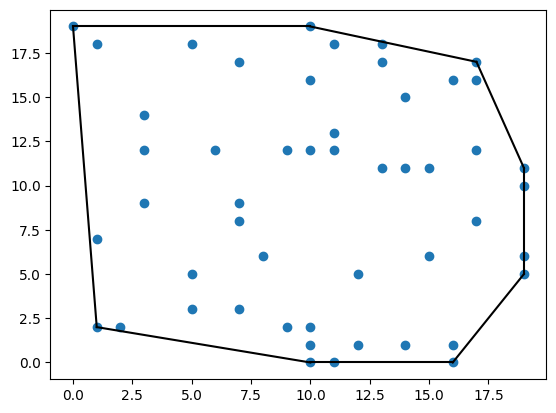

In [23]:
# Задание 5.3 
# Как будет выглядеть выпуклая оболочка поверх точек из предыдущего задания?

haul = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')
for simplex in haul.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

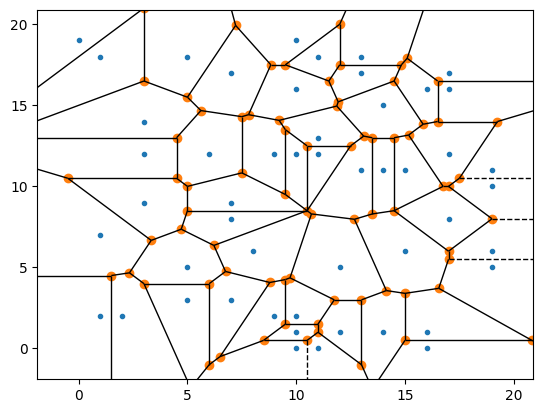

In [24]:
# Задание 5.4
# Как будет выглядеть диаграмма Вороного по точкам из задания 5.2 (с точностью до цветов)?

vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [25]:
# Задание 5.5
# Посчитайте матрицу расстояний Минковского пятой степени между

points_1 = np.array([(0, 0), (28, 13), (21, 24), (5, 17), (13, 8)])
points_2 = np.array([(2, 17), (6, 6), (8, 25), (13, 28), (19, 15)])

dist_mat = distance_matrix(points_1, points_2, p=5)
dist_mat

array([[17.00007663,  6.89219013, 25.01675474, 28.119784  , 20.04414717],
       [26.00044815, 22.01433058, 20.30179359, 17.23047532,  9.00097525],
       [19.02572349, 19.25814812, 13.000007  ,  8.04938647,  9.00097525],
       [ 3.        , 11.00001366,  8.01183019, 11.41508815, 14.00016659],
       [11.7091133 ,  7.00266353, 17.00747657, 20.        ,  7.55313029]])

---

### ОПТИМИЗАЦИЯ БЕЗ ОГРАНИЧЕНИЙ

In [26]:
from scipy.optimize import minimize

In [27]:
def function_to_minimize(x):
    return x[0] ** 3 + 4 * x[0] ** 2 + 10 + 30 * x[1] ** 2